In [21]:
%matplotlib inline
# code from https://docs.scipy.org/doc/scipy/tutorial/special.html
from scipy import special
import numpy as np

In [22]:
from scipy import special
def drumhead_height(n, k, distance, angle, t):
   kth_zero = special.jn_zeros(n, k)[-1]
   return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)
theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])


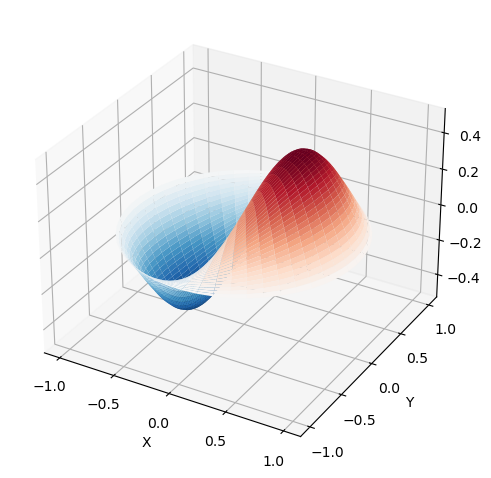

In [23]:
# plot
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes(rect=(0, 0.05, 0.95, 0.95), projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1,
                cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zlabel('Z')
plt.show()


# Optimization

In [24]:
from scipy.optimize import  minimize

Minimize $f(x)=(x-3)^2$

In [25]:
def f(x):
    return (x-3)**2

res = minimize(f, 2)
res.x


array([2.99999999])

Minimise $f(x,y)=(x-1)^2+(y-2.5)^2$ subject to
$$ x-2y+2\geq 0\\ -x-2y+6\geq 0\\-x+2y+2\geq 0\\ x\geq 0\\ y\geq 0$$

In [26]:
def f(x): return (x[0]-1)**2+(x[1]-2.5)**2


cons = (
    {'type': 'ineq', 'fun': lambda x: x[0]-2*x[1]+2},
    {'type': 'ineq', 'fun': lambda x: -x[0]-2*x[1]+6},
    {'type': 'ineq', 'fun': lambda x: -x[0]+2*x[1]+2},
)
bnds = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)
res.x


array([1.4, 1.7])

# Special function

In [27]:
help(special.exp2)

Help on ufunc:

exp2 = <ufunc 'exp2'>
    exp2(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])
    
    exp2(x, out=None)
    
    Compute ``2**x`` element-wise.
    
    Parameters
    ----------
    x : array_like
        `x` must contain real numbers.
    out : ndarray, optional
        Optional output array for the function values
    
    Returns
    -------
    scalar or ndarray
        ``2**x``, computed element-wise.
    
    Examples
    --------
    >>> from scipy.special import exp2
    
    >>> exp2(3)
    8.0
    >>> x = np.array([[-1, -0.5, 0], [0.5, 1, 1.5]])
    >>> exp2(x)
    array([[ 0.5       ,  0.70710678,  1.        ],
           [ 1.41421356,  2.        ,  2.82842712]])



In [28]:
print(special.exp2(2))
print(special.cosdg(90))
print(special.exp10(2))


4.0
-0.0
100.0


# Integration

In [29]:
from scipy import integrate
help(integrate.quad)

Help on function quad in module scipy.integrate._quadpack_py:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate. If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        The ``user_data`` is t

In [30]:
integrate.quad(lambda x: special.exp10(x), 0, 1)


(3.9086503371292665, 4.3394735994897923e-14)

In [31]:
help(integrate.dblquad)


Help on function dblquad in module scipy.integrate._quadpack_py:

dblquad(func, a, b, gfun, hfun, args=(), epsabs=1.49e-08, epsrel=1.49e-08)
    Compute a double integral.
    
    Return the double (definite) integral of ``func(y, x)`` from ``x = a..b``
    and ``y = gfun(x)..hfun(x)``.
    
    Parameters
    ----------
    func : callable
        A Python function or method of at least two variables: y must be the
        first argument and x the second argument.
    a, b : float
        The limits of integration in x: `a` < `b`
    gfun : callable or float
        The lower boundary curve in y which is a function taking a single
        floating point argument (x) and returning a floating point result
        or a float indicating a constant boundary curve.
    hfun : callable or float
        The upper boundary curve in y (same requirements as `gfun`).
    args : sequence, optional
        Extra arguments to pass to `func`.
    epsabs : float, optional
        Absolute tolerance p

In [32]:
def e(x, y): return x*y**2
def f(x): return 1
def g(x): return -1


integrate.dblquad(e, 0, 2, f, g)


(-0.0, 4.405142707569776e-14)

# Fourier Transformations


In [33]:
from scipy.fftpack import fft, ifft
import numpy as np
help(fft)


Help on function fft in module scipy.fftpack._basic:

fft(x, n=None, axis=-1, overwrite_x=False)
    Return discrete Fourier transform of real or complex sequence.
    
    The returned complex array contains ``y(0), y(1),..., y(n-1)``, where
    
    ``y(j) = (x * exp(-2*pi*sqrt(-1)*j*np.arange(n)/n)).sum()``.
    
    Parameters
    ----------
    x : array_like
        Array to Fourier transform.
    n : int, optional
        Length of the Fourier transform. If ``n < x.shape[axis]``, `x` is
        truncated. If ``n > x.shape[axis]``, `x` is zero-padded. The
        default results in ``n = x.shape[axis]``.
    axis : int, optional
        Axis along which the fft's are computed; the default is over the
        last axis (i.e., ``axis=-1``).
    overwrite_x : bool, optional
        If True, the contents of `x` can be destroyed; the default is False.
    
    Returns
    -------
    z : complex ndarray
        with the elements::
    
            [y(0),y(1),..,y(n/2),y(1-n/2),...,y(-

In [34]:
x = np.array([1, 2, 3, 4])
fft(x)

array([10.-0.j, -2.+2.j, -2.-0.j, -2.-2.j])

# Linear Algebra

In [43]:
from scipy import  linalg
help(linalg)


Help on package scipy.linalg in scipy:

NAME
    scipy.linalg

DESCRIPTION
    Linear algebra (:mod:`scipy.linalg`)
    
    .. currentmodule:: scipy.linalg
    
    Linear algebra functions.
    
    .. eventually, we should replace the numpy.linalg HTML link with just `numpy.linalg`
    
    .. seealso::
    
       `numpy.linalg <https://www.numpy.org/devdocs/reference/routines.linalg.html>`__
       for more linear algebra functions. Note that
       although `scipy.linalg` imports most of them, identically named
       functions from `scipy.linalg` may offer more or slightly differing
       functionality.
    
    
    Basics
    
    .. autosummary::
       :toctree: generated/
    
       inv - Find the inverse of a square matrix
       solve - Solve a linear system of equations
       solve_banded - Solve a banded linear system
       solveh_banded - Solve a Hermitian or symmetric banded system
       solve_circulant - Solve a circulant system
       solve_triangular - Solve a

In [39]:
a = np.array([[1, 2], [3, 4]])
linalg.inv(a)


array([[-2. ,  1. ],
       [ 1.5, -0.5]])

# Interpolation Functions

In [38]:
from scipy import interpolate
help(interpolate)

Help on package scipy.interpolate in scipy:

NAME
    scipy.interpolate

DESCRIPTION
    Interpolation (:mod:`scipy.interpolate`)
    
    .. currentmodule:: scipy.interpolate
    
    Sub-package for objects used in interpolation.
    
    As listed below, this sub-package contains spline functions and classes,
    1-D and multidimensional (univariate and multivariate)
    interpolation classes, Lagrange and Taylor polynomial interpolators, and
    wrappers for `FITPACK <http://www.netlib.org/dierckx/>`__
    and DFITPACK functions.
    
    Univariate interpolation
    
    .. autosummary::
       :toctree: generated/
    
       interp1d
       BarycentricInterpolator
       KroghInterpolator
       barycentric_interpolate
       krogh_interpolate
       pchip_interpolate
       CubicHermiteSpline
       PchipInterpolator
       Akima1DInterpolator
       CubicSpline
       PPoly
       BPoly
    
    
    Multivariate interpolation
    
    Unstructured data:
    
    .. autosummar

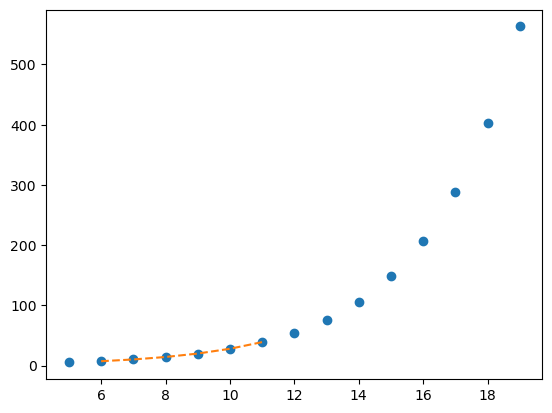

In [42]:
x = np.arange(5, 20)
y = np.exp(x/3.0)
f = interpolate.interp1d(x, y)
x1 = np.arange(6, 12)
y1 = f(x1)
plt.plot(x, y, 'o', x1, y1, '--')
plt.show()
